In [2]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
print(cv2.__version__)

4.1.2


# 使用cv2的空間轉換及numpy的slicing做rgb/bgr轉換

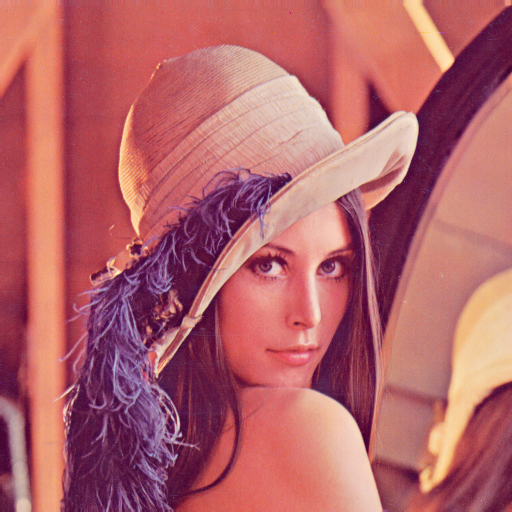

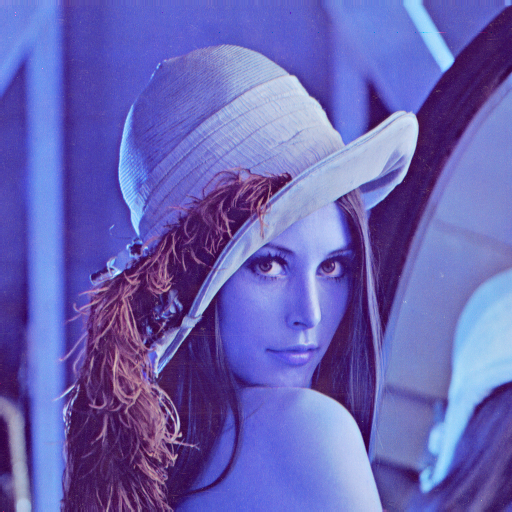

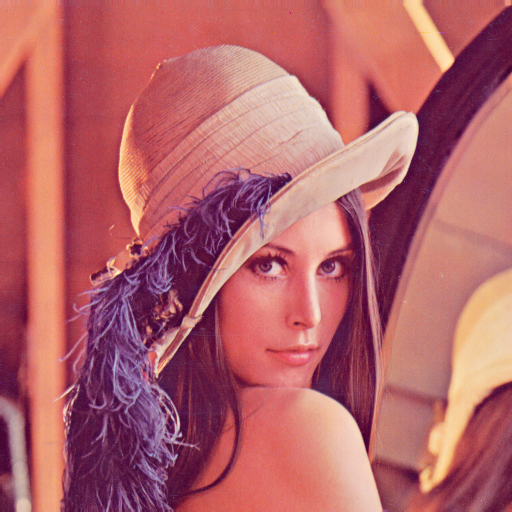

In [3]:
lena=cv2.imread("lenacolor.png")
rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
cv2_imshow(lena)
cv2_imshow(rgb)
cv2_imshow(rgb[:,:,::-1])


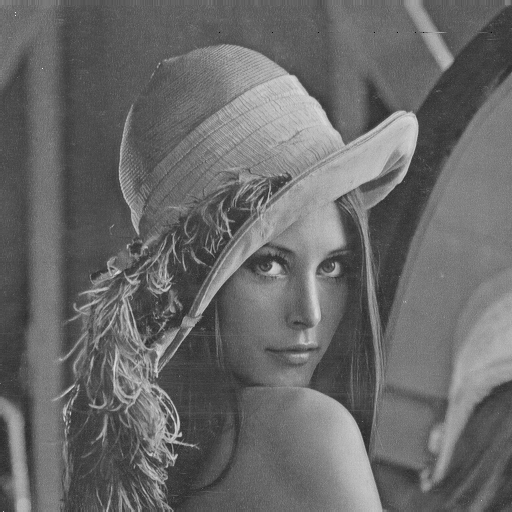

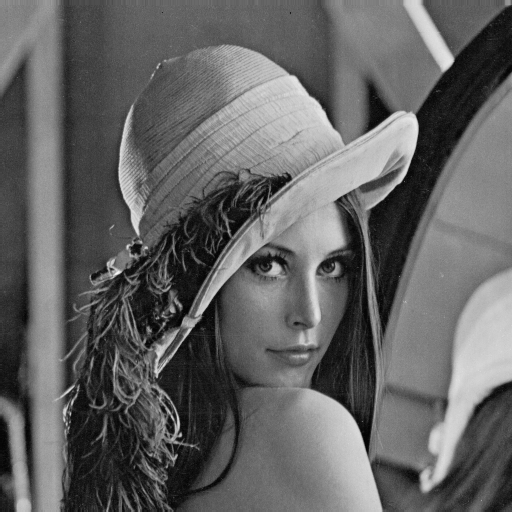

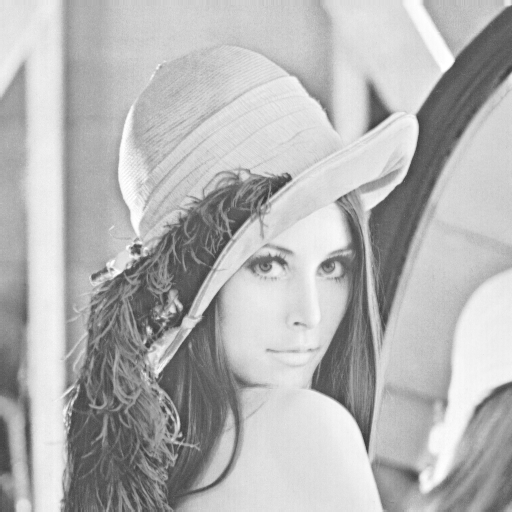

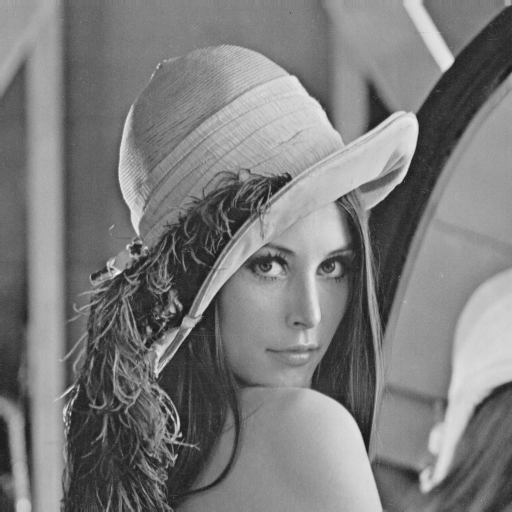

In [13]:
lena = cv2.imread("lenacolor.png")
b,g,r = cv2.split(lena)
gray = (b + g + r) / 3
gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
cv2_imshow(gray)

In [16]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(*flags,sep='\n')

COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_RG2BGR
COLOR_BAYER_RG2BGRA
COLOR_BAYER_RG2BGR_EA
COLOR_BAYER_RG2BGR_VNG
COLOR_BAYER_RG2GRAY
COLOR_BAYER_RG2RGB
COLOR_BAYER_RG2RGBA
COLOR_BAYER_RG2RGB_EA
COLOR_BAYER_RG2RGB_VNG
COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
COLOR_BGR2XYZ
COLOR_BGR2YCR_CB
CO

# 利用HSV方式做顏色過濾

[[[ 0  0 13]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  2]]

 [[ 0  0 13]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  2]]

 [[ 0  0 13]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  2]]

 ...

 [[ 0  0 12]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  1]]

 [[ 0  0 12]
  [ 0  0  0]
  [ 0  0  1]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  1]]

 [[ 0  0 13]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  2]]]


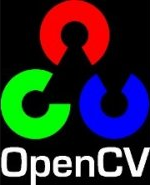

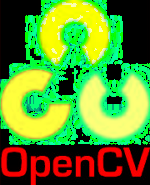

In [24]:
opencv=cv2.imread("opencv_logo.png")
hsv = cv2.cvtColor(opencv, cv2.COLOR_BGR2HSV)
print(hsv)
cv2_imshow(opencv)
cv2_imshow(hsv)



In [30]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)


[[[ 60 255 255]]]


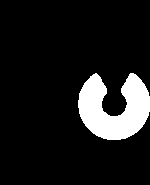

In [19]:
#=============指定藍色值的範圍=============
minBlue = np.array([110,50,50])
maxBlue = np.array([130,255,255])
#確定藍色區域
mask = cv2.inRange(hsv, minBlue, maxBlue)
cv2_imshow(mask)

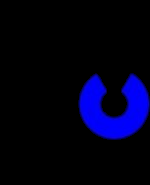

In [21]:
#透過隱藏控制的逐位元與運算，鎖定藍色區域
blue = cv2.bitwise_and(opencv,opencv, mask= mask)
cv2_imshow(blue)

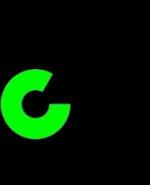

In [22]:
#=============指定綠色值的範圍=============
minGreen = np.array([50,50,50])
maxGreen = np.array([70,255,255])
#確定綠色區域
mask = cv2.inRange(hsv, minGreen, maxGreen)
#透過隱藏控制的逐位元與運算，鎖定綠色區域
green = cv2.bitwise_and(opencv,opencv, mask= mask)
cv2_imshow(green)

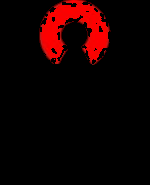

In [23]:
#=============指定紅色值的範圍=============
minRed = np.array([0,50,50])
maxRed = np.array([30,255,255])
#確定紅色區域
mask = cv2.inRange(hsv, minRed, maxRed)
#透過隱藏控制的逐位元與運算，鎖定紅色區域
red= cv2.bitwise_and(opencv,opencv, mask= mask)
cv2_imshow(red)

# opencv的bgra顯示


(512, 512, 4)


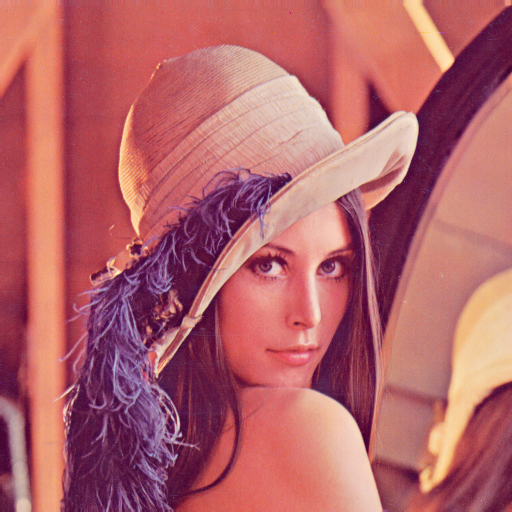

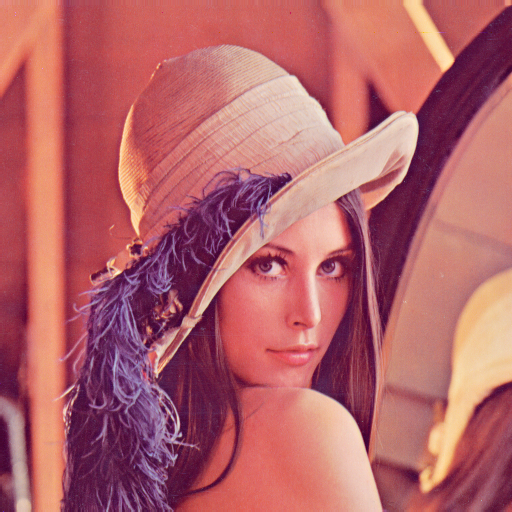

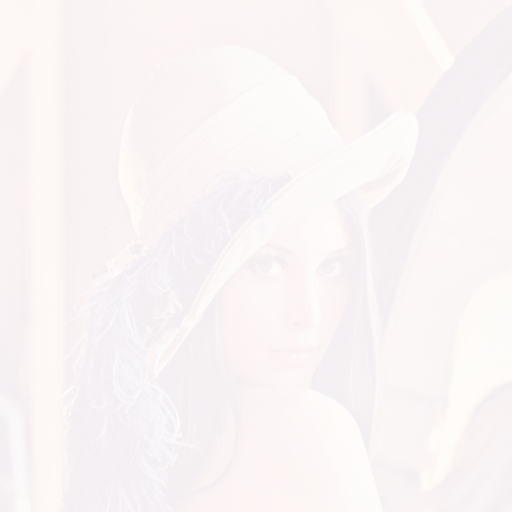

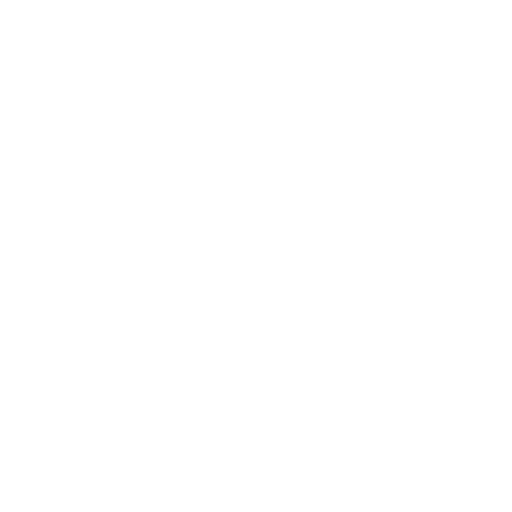

In [27]:
img=cv2.imread("lenacolor.png")
bgra = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
b,g,r,a=cv2.split(bgra)
print(bgra.shape)
a[:,:]=16
bgra125=cv2.merge([b,g,r,a])
a[:,:]=0
bgra0=cv2.merge([b,g,r,a])
cv2_imshow(img)
cv2_imshow(bgra)
cv2_imshow(bgra125)
cv2_imshow(bgra0)
#cv2.imwrite("bgra.png", bgra)
#cv2.imwrite("bgra125.png", bgra125)
#cv2.imwrite("bgra0.png", bgra0)
